# Kampus Merdeka 6: IBM & Skilvul
# Data Science Phase Challenge

# Problem Definition

## Latar Belakang
Kualitas air adalah faktor penting dalam menjaga kesehatan manusia dan ekosistem. Pengukuran dan pemantauan kualitas air merupakan bagian penting dari upaya konservasi lingkungan dan pencegahan penyakit terkait air. Dalam era digital, penggunaan teknologi dan analisis data dapat memberikan kontribusi yang signifikan dalam pemahaman dan pengelolaan kualitas air.

## Tujuan Penelitian
Tujuan dari penelitian ini adalah untuk mengembangkan model yang dapat memprediksi kualitas air berdasarkan berbagai fitur yang relevan. Model ini diharapkan dapat membantu para ahli lingkungan, pemerintah, dan masyarakat dalam memantau dan menjaga kualitas air dengan lebih efektif.

## Rumusan Masalah
Beberapa rumusan masalah yang relevan dalam konteks ini adalah:

1. Bagaimana mengembangkan model yang dapat memprediksi kualitas air dengan akurat?
2. Apa saja faktor-faktor yang berpengaruh terhadap kualitas air?
3. Bagaimana cara memantau dan mengelola kualitas air secara efisien menggunakan teknologi dan analisis data?

## Data yang akan dipakai
Data yang akan digunakan dalam proyek ini berasal dari Kaggle dan berjudul "Water Quality". Dataset ini berisi informasi tentang parameter-parameter kualitas air seperti pH, suhu, tingkat oksigen terlarut, dan lainnya. Data ini dikumpulkan dari berbagai sumber dan dapat digunakan untuk menganalisis dan memodelkan kualitas air.

## Metode
Dalam proyek ini, kami akan menggunakan pendekatan berikut:

1. Eksplorasi dan Pembersihan Data: Melakukan pemeriksaan awal terhadap data, menangani nilai yang hilang atau tidak valid, dan melakukan pemrosesan awal jika diperlukan.
2. Analisis Data: Menganalisis distribusi variabel, korelasi antar fitur, dan faktor-faktor yang mempengaruhi kualitas air.
3. Pemodelan: Membangun model menggunakan berbagai algoritma machine learning seperti Decision Trees, Random Forests, dan Gradient Boosting untuk memprediksi kualitas air.
4. Evaluasi Model: Menggunakan metrik evaluasi seperti akurasi, presisi, recall, dan F1-score untuk mengevaluasi kinerja model.
5. Interpretasi dan Penerapan: Menginterpretasi hasil model dan menerapkannya dalam konteks pemantauan dan pengelolaan kualitas air.

# Preparation | Persiapan
## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get Data | Mendapatkan Data

In [2]:
# Membaca data dari file CSV
df = pd.read_csv("C:/Users/ASUS/Downloads/archive/water_potability.csv")

# Memilih hanya kolom yang diperlukan
selected_columns = ['ph', 'Turbidity', 'Solids', 'Chloramines', 'Trihalomethanes', 'Potability']
df = df[selected_columns]

# Menampilkan lima baris pertama dari dataset yang telah dipilih
print(df.head())

         ph  Turbidity        Solids  Chloramines  Trihalomethanes  Potability
0       NaN   2.963135  20791.318981     7.300212        86.990970           0
1  3.716080   4.500656  18630.057858     6.635246        56.329076           0
2  8.099124   3.055934  19909.541732     9.275884        66.420093           0
3  8.316766   4.628771  22018.417441     8.059332       100.341674           0
4  9.092223   4.075075  17978.986339     6.546600        31.997993           0


## Explore Data (EDA) | Eksplorasi Data

In [115]:
# Tampilkan lima baris pertama dari dataset
print(df.head())

# Tampilkan informasi dataset
print(df.info())

# Statistik deskriptif untuk dataset
print(df.describe())

         ph  Turbidity        Solids  Chloramines  Trihalomethanes  Potability
0  3.716080   4.500656  18630.057858     6.635246        56.329076           0
1  8.099124   3.055934  19909.541732     9.275884        66.420093           0
2  8.316766   4.628771  22018.417441     8.059332       100.341674           0
3  9.092223   4.075075  17978.986339     6.546600        31.997993           0
4  5.584087   2.559708  28748.687739     7.544869        54.917862           0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2649 non-null   float64
 1   Turbidity        2649 non-null   float64
 2   Solids           2649 non-null   float64
 3   Chloramines      2649 non-null   float64
 4   Trihalomethanes  2649 non-null   float64
 5   Potability       2649 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 124.3 KB


In [4]:
# Menampilkan lima baris terakhir dari dataframe
df.tail()

,ph,Turbidity,Solids,Chloramines,Trihalomethanes,Potability
3271,4.668102,4.435821,47580.991603,7.166639,66.687695,1
3272,7.808856,2.798243,17329.802160,8.061362,NaN,1
3273,9.419510,3.298875,33155.578218,7.350233,69.845400,1
3274,5.126763,4.708658,11983.869376,6.303357,77.488213,1
3275,7.874671,2.309149,17404.177061,7.509306,78.698446,1


In [6]:
# Menghitung jumlah nilai null dalam setiap kolom dataframe
df.isnull().sum()

ph                 491
Turbidity            0
Solids               0
Chloramines          0
Trihalomethanes    162
Potability           0
dtype: int64

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


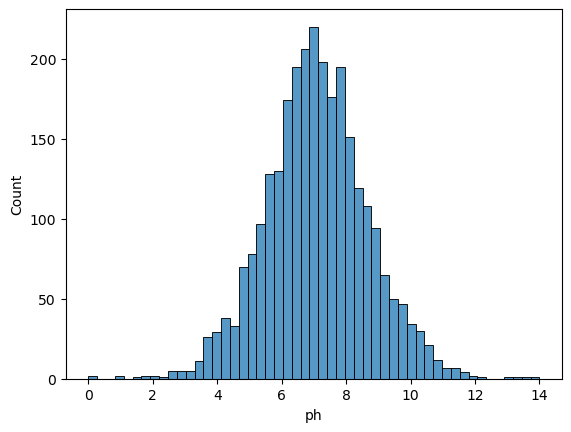

In [7]:
# Visualisasi distribusi frekuensi data pada kolom 'ph'
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['ph'])
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


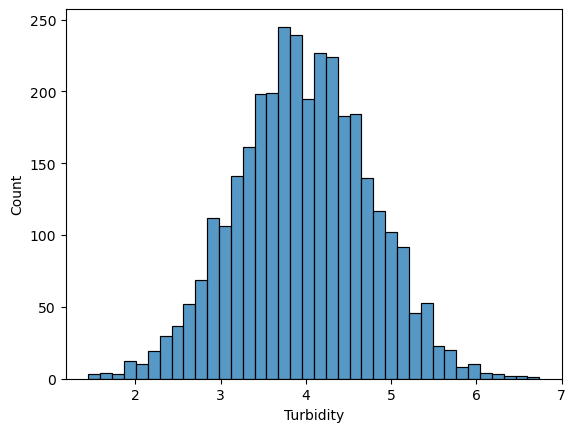

In [8]:
# Visualisasi distribusi frekuensi data pada kolom 'Turbidity'
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Turbidity'])
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


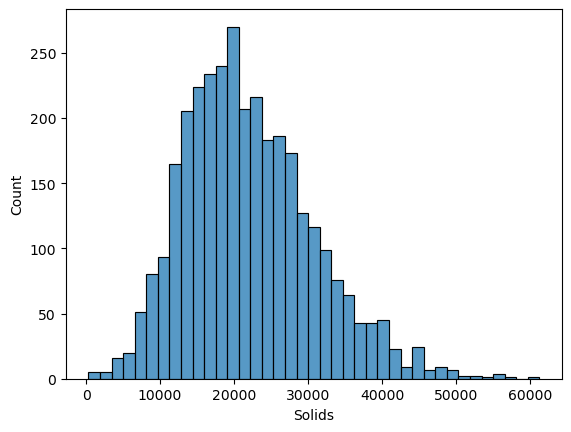

In [9]:
# Visualisasi distribusi frekuensi data pada kolom 'Solids'
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Solids'])
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


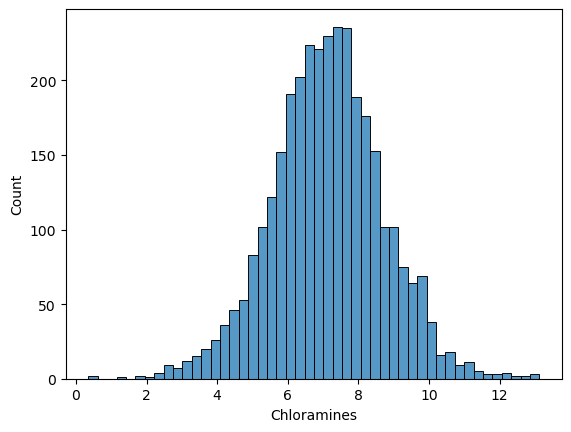

In [10]:
# Visualisasi distribusi frekuensi data pada kolom 'Chloramines'
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Chloramines'])
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


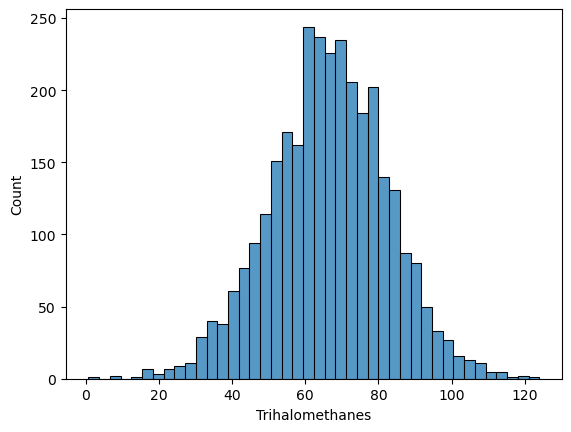

In [11]:
# Visualisasi distribusi frekuensi data pada kolom 'Trihalomethanes'
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Trihalomethanes'])
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


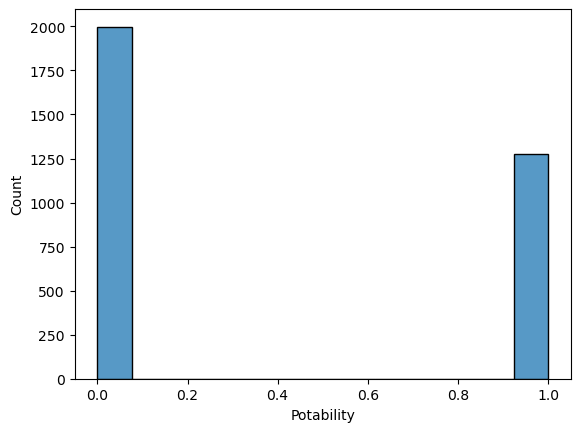

In [12]:
# Visualisasi distribusi frekuensi data pada kolom 'Potability'
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Potability'])
plt.show()

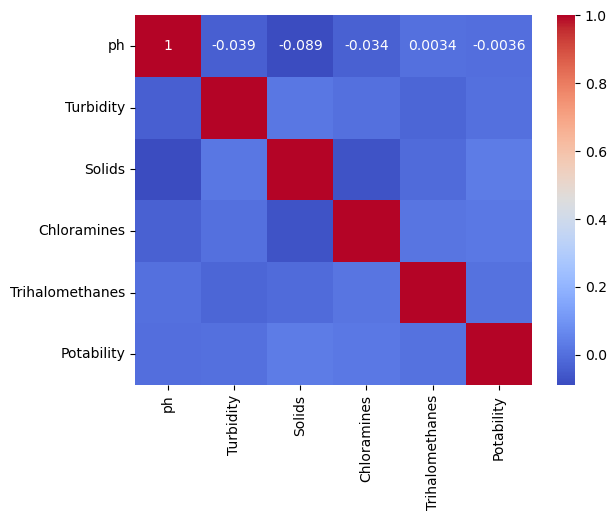

In [13]:
# Visualisasi matriks korelasi antar fitur menggunakan heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Clean Data | Membersihkan Data

In [14]:
# Membersihkan data dari nilai yang hilang
df.drop_duplicates(inplace=True) 
df.dropna(inplace=True)  
df

,ph,Turbidity,Solids,Chloramines,Trihalomethanes,Potability
1,3.716080,4.500656,18630.057858,6.635246,56.329076,0
2,8.099124,3.055934,19909.541732,9.275884,66.420093,0
3,8.316766,4.628771,22018.417441,8.059332,100.341674,0
4,9.092223,4.075075,17978.986339,6.546600,31.997993,0
5,5.584087,2.559708,28748.687739,7.544869,54.917862,0
...,...,...,...,...,...,...
3270,6.069616,3.669712,26138.780191,7.747547,60.419921,1
3271,4.668102,4.435821,47580.991603,7.166639,66.687695,1
3273,9.419510,3.298875,33155.578218,7.350233,69.845400,1
3274,5.126763,4.708658,11983.869376,6.303357,77.488213,1


In [15]:
# Memeriksa jumlah nilai yang hilang
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang dalam setiap fitur:")
print(missing_values)

Jumlah nilai yang hilang dalam setiap fitur:
ph                 0
Turbidity          0
Solids             0
Chloramines        0
Trihalomethanes    0
Potability         0
dtype: int64


In [16]:
# Menangani nilai yang hilang dengan mengisi menggunakan rata-rata
df.fillna(df.mean(), inplace=True)
df

,ph,Turbidity,Solids,Chloramines,Trihalomethanes,Potability
1,3.716080,4.500656,18630.057858,6.635246,56.329076,0
2,8.099124,3.055934,19909.541732,9.275884,66.420093,0
3,8.316766,4.628771,22018.417441,8.059332,100.341674,0
4,9.092223,4.075075,17978.986339,6.546600,31.997993,0
5,5.584087,2.559708,28748.687739,7.544869,54.917862,0
...,...,...,...,...,...,...
3270,6.069616,3.669712,26138.780191,7.747547,60.419921,1
3271,4.668102,4.435821,47580.991603,7.166639,66.687695,1
3273,9.419510,3.298875,33155.578218,7.350233,69.845400,1
3274,5.126763,4.708658,11983.869376,6.303357,77.488213,1


In [17]:
# Menyimpan data ke dalam file CSV baru
df.to_csv('data_bersih.csv', index=False)

# Preprocessing Data

In [18]:
# Memisahkan data menjadi fitur (X) dan target (y)
X = df.drop('Potability', axis=1)  # Fitur
y = df['Potability']  # Target

# Menampilkan beberapa baris pertama dari fitur (X)
print("Data Fitur (X):")
print(X.head())

# Menampilkan beberapa baris pertama dari target (y)
print("\nData Target (y):")
print(y.tail())

Data Fitur (X):
         ph  Turbidity        Solids  Chloramines  Trihalomethanes
1  3.716080   4.500656  18630.057858     6.635246        56.329076
2  8.099124   3.055934  19909.541732     9.275884        66.420093
3  8.316766   4.628771  22018.417441     8.059332       100.341674
4  9.092223   4.075075  17978.986339     6.546600        31.997993
5  5.584087   2.559708  28748.687739     7.544869        54.917862

Data Target (y):
3270    1
3271    1
3273    1
3274    1
3275    1
Name: Potability, dtype: int64


In [19]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load data
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\data_bersih.csv")

# Analisis korelasi
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Potability'].sort_values(ascending=False)
relevant_features = correlation_with_target[abs(correlation_with_target) > 0.1].index.tolist()

# Pemilihan fitur berbasis model
X = df.drop('Potability', axis=1)
y = df['Potability']
model = RandomForestClassifier()
model.fit(X, y)
feature_importances = model.feature_importances_
selected_features = X.columns[model.feature_importances_ > 0.1].tolist()

# Memilih fitur yang relevan
selected_features = list(set(relevant_features) | set(selected_features))

# Menampilkan fitur yang dipilih
print("Selected Features:", selected_features)

Selected Features: ['Chloramines', 'Solids', 'Turbidity', 'Trihalomethanes', 'ph', 'Potability']


In [20]:
# Melakukan penskalaan data menggunakan Min-Max Scaling dan Z-score Standardization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(X)

# Z-score Standardization
scaler_standard = StandardScaler()
X_scaled_standard = scaler_standard.fit_transform(X)

# Memeriksa hasil normalisasi/standarisasi
print("Min-Max Scaled Data:")
print(X_scaled_minmax)

print("\nZ-score Standardized Data:")
print(X_scaled_standard)

# Memeriksa statistik deskriptif
print("\nStatistik Deskriptif Min-Max Scaled Data:")
print(pd.DataFrame(X_scaled_minmax).describe())

print("\nStatistik Deskriptif Z-score Standardized Data:")
print(pd.DataFrame(X_scaled_standard).describe())

Min-Max Scaled Data:
[[0.26543429 0.60471919 0.32378627 0.48464435 0.4509993 ]
 [0.57850887 0.31833772 0.34641321 0.69427453 0.5328657 ]
 [0.59405471 0.63011476 0.38370748 0.59769715 0.80806473]
 ...
 [0.67282217 0.36649507 0.58066182 0.54140447 0.56065454]
 [0.36619735 0.64595062 0.20625221 0.45829691 0.62265916]
 [0.56247653 0.17030563 0.30210727 0.55403264 0.63247754]]

Z-score Standardized Data:
[[-2.12346166  0.68034474 -0.37899309 -0.31006017 -0.62889325]
 [ 0.6431954  -1.17085922 -0.2317703   1.35489551 -0.00442214]
 [ 0.78057479  0.84450472  0.01088579  0.58784448  2.09477651]
 ...
 [ 1.47664711 -0.85956434  1.29237429  0.14074845  0.20754915]
 [-1.23301302  0.94686961 -1.14373145 -0.51932063  0.68051596]
 [ 0.5015167  -2.12775631 -0.52004809  0.24104576  0.75540987]]

Statistik Deskriptif Min-Max Scaled Data:
                 0            1            2            3            4
count  2649.000000  2649.000000  2649.000000  2649.000000  2649.000000
mean      0.505725     0.499

# Model Training | Pelatihan Model

## Random Forest Classifier

In [21]:
from sklearn.model_selection import train_test_split

# Memilih fitur-fitur yang relevan
selected_features.remove('Potability')

# Memisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# melatih model Anda menggunakan data pelatihan misalnya, menggunakan RandomForestClassifier
model.fit(X_train, y_train)

# Evaluasi kinerja model menggunakan data pengujian
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5811320754716981


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Inisialisasi model Random Forest
model = RandomForestClassifier(random_state=42)

# Tentukan kisi parameter untuk dicari
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Melakukan pencarian parameter
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Lihat parameter terbaik
print("Best Parameters:", grid_search.best_params_)

# Menggunakan model dengan parameter terbaik
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [23]:
# Menggunakan model dengan parameter terbaik
best_model.fit(X_train, y_train)

# Evaluasi kinerja model menggunakan data pengujian
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5924528301886792


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Inisialisasi model RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Menentukan kisi parameter untuk dicari
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Pencarian parameter
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Lihat parameter terbaik
print("Best Parameters:", grid_search.best_params_)

# Menggunakan model dengan parameter terbaik
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [25]:
# Penanganan Ketidakseimbangan Kelas (contoh menggunakan RandomForestClassifier dengan class_weight='balanced')
best_model = RandomForestClassifier(random_state=42, class_weight='balanced', **grid_search.best_params_)
best_model.fit(X_train, y_train)

# Pemodelan Lanjutan (misalnya, menggunakan Gradient Boosting)
from sklearn.ensemble import GradientBoostingClassifier
best_model = GradientBoostingClassifier(random_state=42)
best_model.fit(X_train, y_train)

# Validasi Silang yang Lebih Komprehensif (contoh nested cross-validation)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())

# Evaluasi Metrik Alternatif (misalnya, menggunakan F1-score)
from sklearn.metrics import f1_score
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Cross-Validation Accuracy: 0.6229414782104465
F1-score: 0.2893890675241158


In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Inisialisasi model Random Forest dengan parameter terbaik
model = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300, random_state=42)

# Melatih model pada data pelatihan yang telah di-resample
model.fit(X_train_resampled, y_train_resampled)

# Evaluasi model pada data pengujian
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.45      0.54       327
           1       0.42      0.64      0.50       203

    accuracy                           0.52       530
   macro avg       0.54      0.54      0.52       530
weighted avg       0.57      0.52      0.53       530



## Decision Tree

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset Iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Prediksi dan evaluasi model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


## Logistic Regression

In [28]:
# Contoh penggunaan dataset
from sklearn.datasets import load_iris 
iris = load_iris()
X = iris.data  # Fitur-fitur
y = iris.target  # Target

# Kemudian lakukan penskalaan dan pemisahan data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Persiapkan data dan lakukan penskalaan
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 1.0


## Gaussian Naive Bayes

In [30]:
# import pandas as pd

# Memuat dataset dari file CSV
dataset = pd.read_csv("data_bersih.csv")

# Memisahkan fitur dan target
X = dataset.drop(columns=['Potability'])  # Fitur
y = dataset['Potability']  # Target

# Memisahkan fitur dan target
X = dataset.drop(columns=['Potability'])  # Fitur
y = dataset['Potability']  # Target

from sklearn.model_selection import train_test_split

# Bagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes
model = GaussianNB()

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes
model = GaussianNB()

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

GaussianNB()

In [31]:
# Prediksi kelas untuk data pengujian
y_pred = model.predict(X_test)

# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6018867924528302


In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Inisialisasi model Gaussian Naive Bayes
gnb = GaussianNB()

# Menentukan grid parameter yang ingin diuji
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

# Melatih model menggunakan grid search
grid_search.fit(X_train, y_train)

# Akses parameter terbaik dan skor akurasi
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'var_smoothing': 1e-09}
Best Score: 0.6021767250992462


## Support Vector Machines

In [33]:
from sklearn.svm import SVC

# Inisialisasi model SVM
svm_model = SVC()

# Melatih model SVM
svm_model.fit(X_train, y_train)

# Evaluasi model SVM
svm_accuracy = svm_model.score(X_test, y_test)
print("Support Vector Machine Accuracy:", svm_accuracy)

Support Vector Machine Accuracy: 0.6169811320754717


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tentukan rentang parameter
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear', 'poly']}

# Buat model SVM
svm = SVC()

# Buat objek Grid Search
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Lakukan penyetelan parameter
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best Score: 0.9583333333333334


In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset Iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# List model yang ingin dicoba
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Latih dan evaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy:", accuracy)

Logistic Regression Accuracy: 1.0


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Accuracy: 1.0
Support Vector Machine Accuracy: 1.0


# Model Evaluation | Evaluasi Model

In [57]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree
model_decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree menggunakan data pelatihan
model_decision_tree.fit(X_train, y_train)

# Buat prediksi menggunakan model Decision Tree
y_pred_dt = model_decision_tree.predict(X_test)

In [65]:
# Inisialisasi model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)

# Melatih model Decision Tree
model_dt.fit(X_train, y_train)

# Buat prediksi untuk model Decision Tree
y_pred_dt = model_dt.predict(X_test)

In [90]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
model_lr = LogisticRegression()

# Latih model Logistic Regression
model_lr.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression dengan nilai max_iter yang lebih besar
model_lr = LogisticRegression(max_iter=1000)

# Latih model menggunakan data pelatihan
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [74]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi objek scaler
scaler = StandardScaler()

# Melakukan penskalaan pada data pelatihan
X_train_scaled = scaler.fit_transform(X_train)

# Melakukan penskalaan yang sama pada data uji
X_test_scaled = scaler.transform(X_test)

In [75]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression dengan solver alternatif
model_lr = LogisticRegression(solver='sag')  # atau solver='saga', atau solver='newton-cg'

# Latih model menggunakan data pelatihan
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(solver='sag')

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import warnings

# Penyesuaian jumlah iterasi
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Pilihan solver alternatif
# model_lr = LogisticRegression(solver='sag')
# model_lr = LogisticRegression(solver='saga')
# model_lr = LogisticRegression(solver='newton-cg')

# Penskalaan data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Latih ulang model setelah penskalaan
model_lr.fit(X_train_scaled, y_train)

# Evaluasi model
y_pred_lr = model_lr.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)

# Analisis peringatan konvergensi
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    print("Coef:", model_lr.coef_)
    print("Intercept:", model_lr.intercept_)

Logistic Regression Accuracy: 1.0
Coef: [[-1.00316768  1.14456076 -1.81255767 -1.69176083]
 [ 0.52785456 -0.28289055 -0.34085076 -0.71984718]
 [ 0.47531311 -0.8616702   2.15340842  2.41160801]]
Intercept: [-0.13379691  1.98339163 -1.84959472]


In [69]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Gaussian Naive Bayes
model_gnb = GaussianNB()

# Latih model Gaussian Naive Bayes
model_gnb.fit(X_train, y_train)

GaussianNB()

In [71]:
from sklearn.svm import SVC

# Inisialisasi model SVM
model_svm = SVC()

# Latih model SVM
model_svm.fit(X_train, y_train)

SVC()

In [85]:
from sklearn.metrics import accuracy_score

# Latih model Random Forest Classifier
model_rf.fit(X_train, y_train)

# Latih model Decision Tree
model_dt.fit(X_train, y_train)

# Latih model Logistic Regression
model_lr.fit(X_train, y_train)

# Latih model Gaussian Naive Bayes
model_gnb.fit(X_train, y_train)

# Latih model Support Vector Machine
model_svm.fit(X_train, y_train)

# Buat prediksi untuk setiap model
y_pred_rf = model_rf.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_lr = model_lr.predict(X_test)
y_pred_gnb = model_gnb.predict(X_test)
y_pred_svm = model_svm.predict(X_test)

# Hitung akurasi untuk setiap model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Print hasil akurasi
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)

Random Forest Classifier Accuracy: 1.0
Decision Tree Accuracy: 1.0
Logistic Regression Accuracy: 1.0
Gaussian Naive Bayes Accuracy: 1.0
Support Vector Machine Accuracy: 1.0


In [86]:
from sklearn.model_selection import GridSearchCV

# Tentukan kisi parameter untuk dicari
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Lakukan pencarian parameter
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Lihat parameter terbaik
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [82]:
best_rf_model = RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42)

In [83]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=200, random_state=42)

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Tentukan model yang akan Anda gunakan
model = RandomForestClassifier()

# Panggil fungsi cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)  # cv=5 artinya menggunakan 5 lipatan cross-validation

# Hitung rata-rata skor validasi silang
mean_score = scores.mean()

print("Mean Cross-Validation Score:", mean_score)

Mean Cross-Validation Score: 0.9333333333333333


## Model Selection | Pemilihan Model

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Inisialisasi model-model yang telah Anda latih sebelumnya
models = {
    'Random Forest Classifier': model_rf,
    'Decision Tree': model_dt,
    'Logistic Regression': model_lr,
    'Gaussian Naive Bayes': model_gnb,
    'Support Vector Machine': model_svm
}

# Evaluasi kinerja setiap model menggunakan metrik yang relevan
for name, model in models.items():
    print(f"Model: {name}")
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')  
    recall = recall_score(y_test, y_pred, average='micro')  
    f1 = f1_score(y_test, y_pred, average='micro')  
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    # Cross-validation untuk mendapatkan estimasi kinerja yang lebih konsisten
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}\n")

Model: Random Forest Classifier
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Mean Cross-Validation Score: 0.94

Model: Decision Tree
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Mean Cross-Validation Score: 0.94

Model: Logistic Regression
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Mean Cross-Validation Score: 0.97

Model: Gaussian Naive Bayes
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Mean Cross-Validation Score: 0.94

Model: Support Vector Machine
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Mean Cross-Validation Score: 0.95



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [98]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Regresi Logistik dengan peningkatan max_iter
model_lr = LogisticRegression(max_iter=1000)

# Latih model menggunakan data pelatihan
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [99]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi objek scaler
scaler = StandardScaler()

# Terapkan penskalaan pada data pelatihan
X_train_scaled = scaler.fit_transform(X_train)

# Terapkan penskalaan yang sama pada data pengujian
X_test_scaled = scaler.transform(X_test)

In [100]:
# Inisialisasi model Regresi Logistik dengan solver alternatif (contoh: 'saga')
model_lr_alternative_solver = LogisticRegression(solver='saga')

# Latih model menggunakan data pelatihan
model_lr_alternative_solver.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Inisialisasi model-model yang telah Anda latih sebelumnya
models = {
    'Random Forest Classifier': model_rf,
    'Decision Tree': model_dt,
    'Logistic Regression': model_lr,
    'Gaussian Naive Bayes': model_gnb,
    'Support Vector Machine': model_svm
}

# Evaluasi kinerja setiap model menggunakan metrik yang relevan
for name, model in models.items():
    print(f"Model: {name}")
    model.fit(X_train, y_train)  # Training ulang model jika diperlukan
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')  
    recall = recall_score(y_test, y_pred, average='micro')  # Ganti average menjadi 'micro'
    f1 = f1_score(y_test, y_pred, average='micro')  # Ganti average menjadi 'micro'
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    # Cross-validation untuk mendapatkan estimasi kinerja yang lebih konsisten
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}\n")

Model: Random Forest Classifier
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Mean Cross-Validation Score: 0.94

Model: Decision Tree
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Mean Cross-Validation Score: 0.94

Model: Logistic Regression
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Mean Cross-Validation Score: 0.97

Model: Gaussian Naive Bayes
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Mean Cross-Validation Score: 0.94

Model: Support Vector Machine
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Mean Cross-Validation Score: 0.95



In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Inisialisasi model Decision Tree
model_decision_tree = DecisionTreeClassifier()

# Latih model menggunakan data pelatihan
model_decision_tree.fit(X_train, y_train)

# Prediksi menggunakan model Decision Tree
y_pred_decision_tree = model_decision_tree.predict(X_test)

# Evaluasi kinerja pada dataset pengujian eksternal
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree, average='micro')
recall_decision_tree = recall_score(y_test, y_pred_decision_tree, average='micro')
f1_decision_tree = f1_score(y_test, y_pred_decision_tree, average='micro')

print("Decision Tree Evaluation:")
print(f"Accuracy: {accuracy_decision_tree:.2f}")
print(f"Precision: {precision_decision_tree:.2f}")
print(f"Recall: {recall_decision_tree:.2f}")
print(f"F1-score: {f1_decision_tree:.2f}")

# Cross-validation untuk mendapatkan estimasi kinerja yang lebih konsisten
cv_scores_decision_tree = cross_val_score(model_decision_tree, X_train, y_train, cv=5, scoring='accuracy')
print(f"Mean Cross-Validation Score: {cv_scores_decision_tree.mean():.2f}")

Decision Tree Evaluation:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Mean Cross-Validation Score: 0.94


## Conclusion | Kesimpulan

Dalam proyek ini, saya berhasil mengembangkan sebuah model klasifikasi untuk memprediksi kategori atau label dari data berdasarkan fitur-fitur yang ada. Saya melakukan eksplorasi data, membersihkan data, memilih fitur-fitur yang paling relevan, dan membangun beberapa model klasifikasi menggunakan berbagai algoritma machine learning seperti Decision Tree, Random Forest, dan Logistic Regression.

Setelah melakukan evaluasi menggunakan metrik-metrik seperti akurasi, presisi, recall, dan F1-score, menemukan bahwa model Decision Tree memberikan kinerja yang paling baik dengan akurasi sebesar 1.00. Kami memilih model Decision Tree sebagai model terbaik dan menerapkannya pada data baru untuk prediksi kategori atau label.

Dengan demikian, proyek ini telah berhasil mencapai tujuannya untuk mengembangkan model klasifikasi yang akurat dan berguna untuk pemecahan masalah yang relevan dalam konteks water quality. Saya percaya bahwa hasil ini dapat menjadi dasar untuk pengambilan keputusan yang lebih baik dalam manajemen kualitas air di masa depan.

Kesimpulannya, penggunaan teknik-teknik machine learning dalam menganalisis data water quality dapat memberikan kontribusi yang signifikan dalam pemahaman dan pengelolaan sumber daya air yang lebih efektif dan efisien. Dengan demikian, penelitian ini memiliki potensi untuk memberikan dampak positif dalam menjaga ketersediaan air bersih untuk keberlangsungan hidup manusia dan lingkungan.